In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
    # Говорим Jupeter Notebook, чтобы весь графический вывод был в браузере, а не в отдельном окне
%matplotlib inline
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Для расчёта значений метрик и выбора моделей



# Описание работы
Удовлетворенность клиентов авиакомпании зависит от многих факторов, но по сути этот тип удовлетворенности клиентов ничем не отличается от любого другого бизнеса. Проблема заключается в том, что авиакомпании подвержены влиянию многих нормативных актов и предоставляют услугу, которая является чрезвычайно сложной, поэтому не все факторы, влияющие на удовлетворенность клиентов, полностью находятся под контролем авиакомпании. Таким образом, многие авиакомпании пытаются компенсировать разницу, предоставляя исключительное обслуживание и комфорт клиентов и посредством высококачественной презентации. Поэтому любой авиакомпании нужно разработать конкретный механизм измерения удовлетворенности пассажиров услугами, предоставленных авиакомпанией. В данной работе решается задача классификации удовлетворенности клиентов авикомпании.

# 1) Загрузка и чтение данных

In [2]:
url = "https://raw.githubusercontent.com/Nikita23456/Machinelearning/main/airline_passenger_satisfaction.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(129880, 24)

In [3]:
data_raw.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

Признаки:  
1)Unnamed 0(переименуем в ID) - ID пассажира  
2)Gender - пол пассажира  
3)customer_type - тип клиента  
4)age - возраст клиента  
5)type_of_travel - тип поездки  
6)customer_class - класс клиента  
7)flight_distance - дистанция полета(в милях)  
8)inflight_wifi_service - качество Wi-Fi во время полета  
9)departure_arrival_time_convenient - удобное время вылета и прибытия  
10)ease_of_online_booking - простота онлайн-бронирования  
11)gate_location - удобство расположения выхода  
12)food_and_drink - качество еды  
13)online_boarding - удобство онлайн регистрации  
14)seat_comfort - комфорт сиденья  
15)inflight_entertainment - развлечения на борту  
16)onboard_service - качество бортового обслуживания  
17)leg_room_service - обслуживание ног в номере  
18)baggage_handling - качество обработки багажа  
19)checkin_service - качество службы регистрации  
20)inflight_service - качество обслуживания в полете  
21)cleanliness - качество чистоты  
22)departure_delay_in_minutes - задержка отправления в минутах  
23)arrival_delay_in_minutes - задержка прибытия в минутах  
24)satisfaction - удовлетворение  
  
Переименуем колонку "Unnamed 0" в "ID"

In [5]:
data_raw.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
data_raw.columns

Index(['ID', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

Преобразуем к типу 'category'

In [6]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['type_of_travel'] = data_raw['type_of_travel'].astype('category')
data_raw['customer_class'] = data_raw['customer_class'].astype('category')
data_raw['satisfaction'] = data_raw['satisfaction'].astype('category')

In [7]:
data_raw['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [8]:
data_raw['customer_type'].dtype

CategoricalDtype(categories=['Loyal Customer', 'disloyal Customer'], ordered=False)

In [9]:
data_raw['type_of_travel'].dtype

CategoricalDtype(categories=['Business travel', 'Personal Travel'], ordered=False)

In [10]:
data_raw['customer_class'].dtype

CategoricalDtype(categories=['Business', 'Eco', 'Eco Plus'], ordered=False)

In [11]:
data_raw['satisfaction'].dtype

CategoricalDtype(categories=['neutral or dissatisfied', 'satisfied'], ordered=False)

# 2)Визуализация данных и вычисление основных характеристик

Получим информацию о признаках  
Колличетсвенные:  

In [12]:
data_raw.describe()

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.  
Count - количество значений для каждого признака. Для всех признаков это число равно  129880, кроме признака "arrival_delay_in_minutes", а это значит, что данный признак имеет 393 пропущенных значений.  

Получим информацию о категориальных:

In [13]:
data_raw.describe(include=['category'])

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


Для категориальных признаков мы получили такие характеристики, как:

1)Count - Количество значений. Как можно заметить, пропущенных значений нет  
2)Unique - Количество уникальных значений  
3)Top - Наиболее встречающееся значение  
4)Freq - Частота наиболее встречающегося значения  

Можно вычислить матрицу корреляции для количественных признаков:

In [14]:
corr_matrix = data_raw.corr()
corr_matrix

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
ID,1.000000,0.007166,0.002895,-0.002745,-0.002134,0.001116,0.003236,0.000937,0.002947,0.001868,0.000269,0.001279,0.002237,0.000007,-0.000489,0.001669,-0.000944,-0.003972,-0.003299
age,0.007166,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
flight_distance,0.002895,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
inflight_wifi_service,-0.002745,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
departure_arrival_time_convenient,-0.002134,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
ease_of_online_booking,0.001116,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
gate_location,0.003236,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
food_and_drink,0.000937,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
online_boarding,0.002947,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730
seat_comfort,0.001868,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521


Для удобства используем визуальный образ этой матрицы

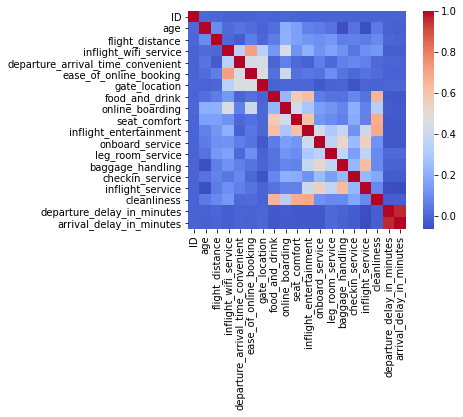

In [15]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Совершенно очевидно, что две задержки сильно коррелированы.

In [16]:
corr_matrix >= 0.7

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
ID,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
age,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
flight_distance,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
inflight_wifi_service,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
departure_arrival_time_convenient,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ease_of_online_booking,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
gate_location,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
food_and_drink,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
online_boarding,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
seat_comfort,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Рассмотрим все категориальные признаки:

In [17]:
data_raw['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

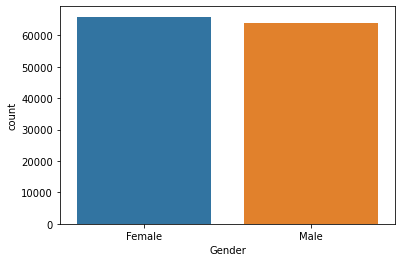

In [18]:
sns.countplot(x='Gender', data=data_raw)
pass

In [19]:
data_raw['customer_type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

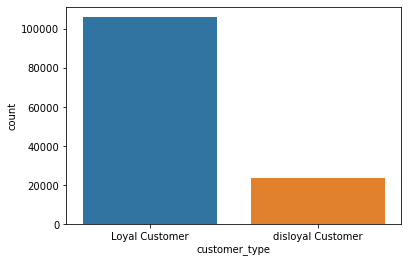

In [20]:
sns.countplot(x='customer_type', data=data_raw)
pass


In [21]:
data_raw['type_of_travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

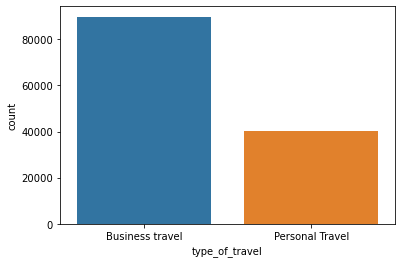

In [22]:
sns.countplot(x='type_of_travel', data=data_raw)
pass

In [23]:
data_raw['customer_class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: customer_class, dtype: int64

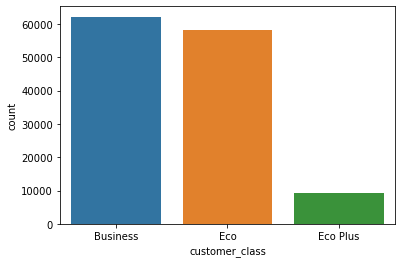

In [24]:
sns.countplot(x='customer_class', data=data_raw)
pass

In [25]:
data_raw['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

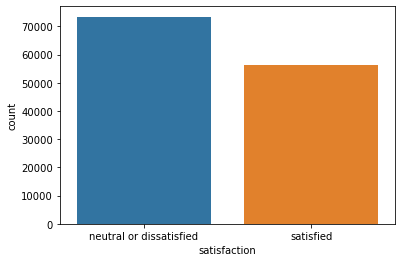

In [26]:
sns.countplot(x='satisfaction', data=data_raw)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных:

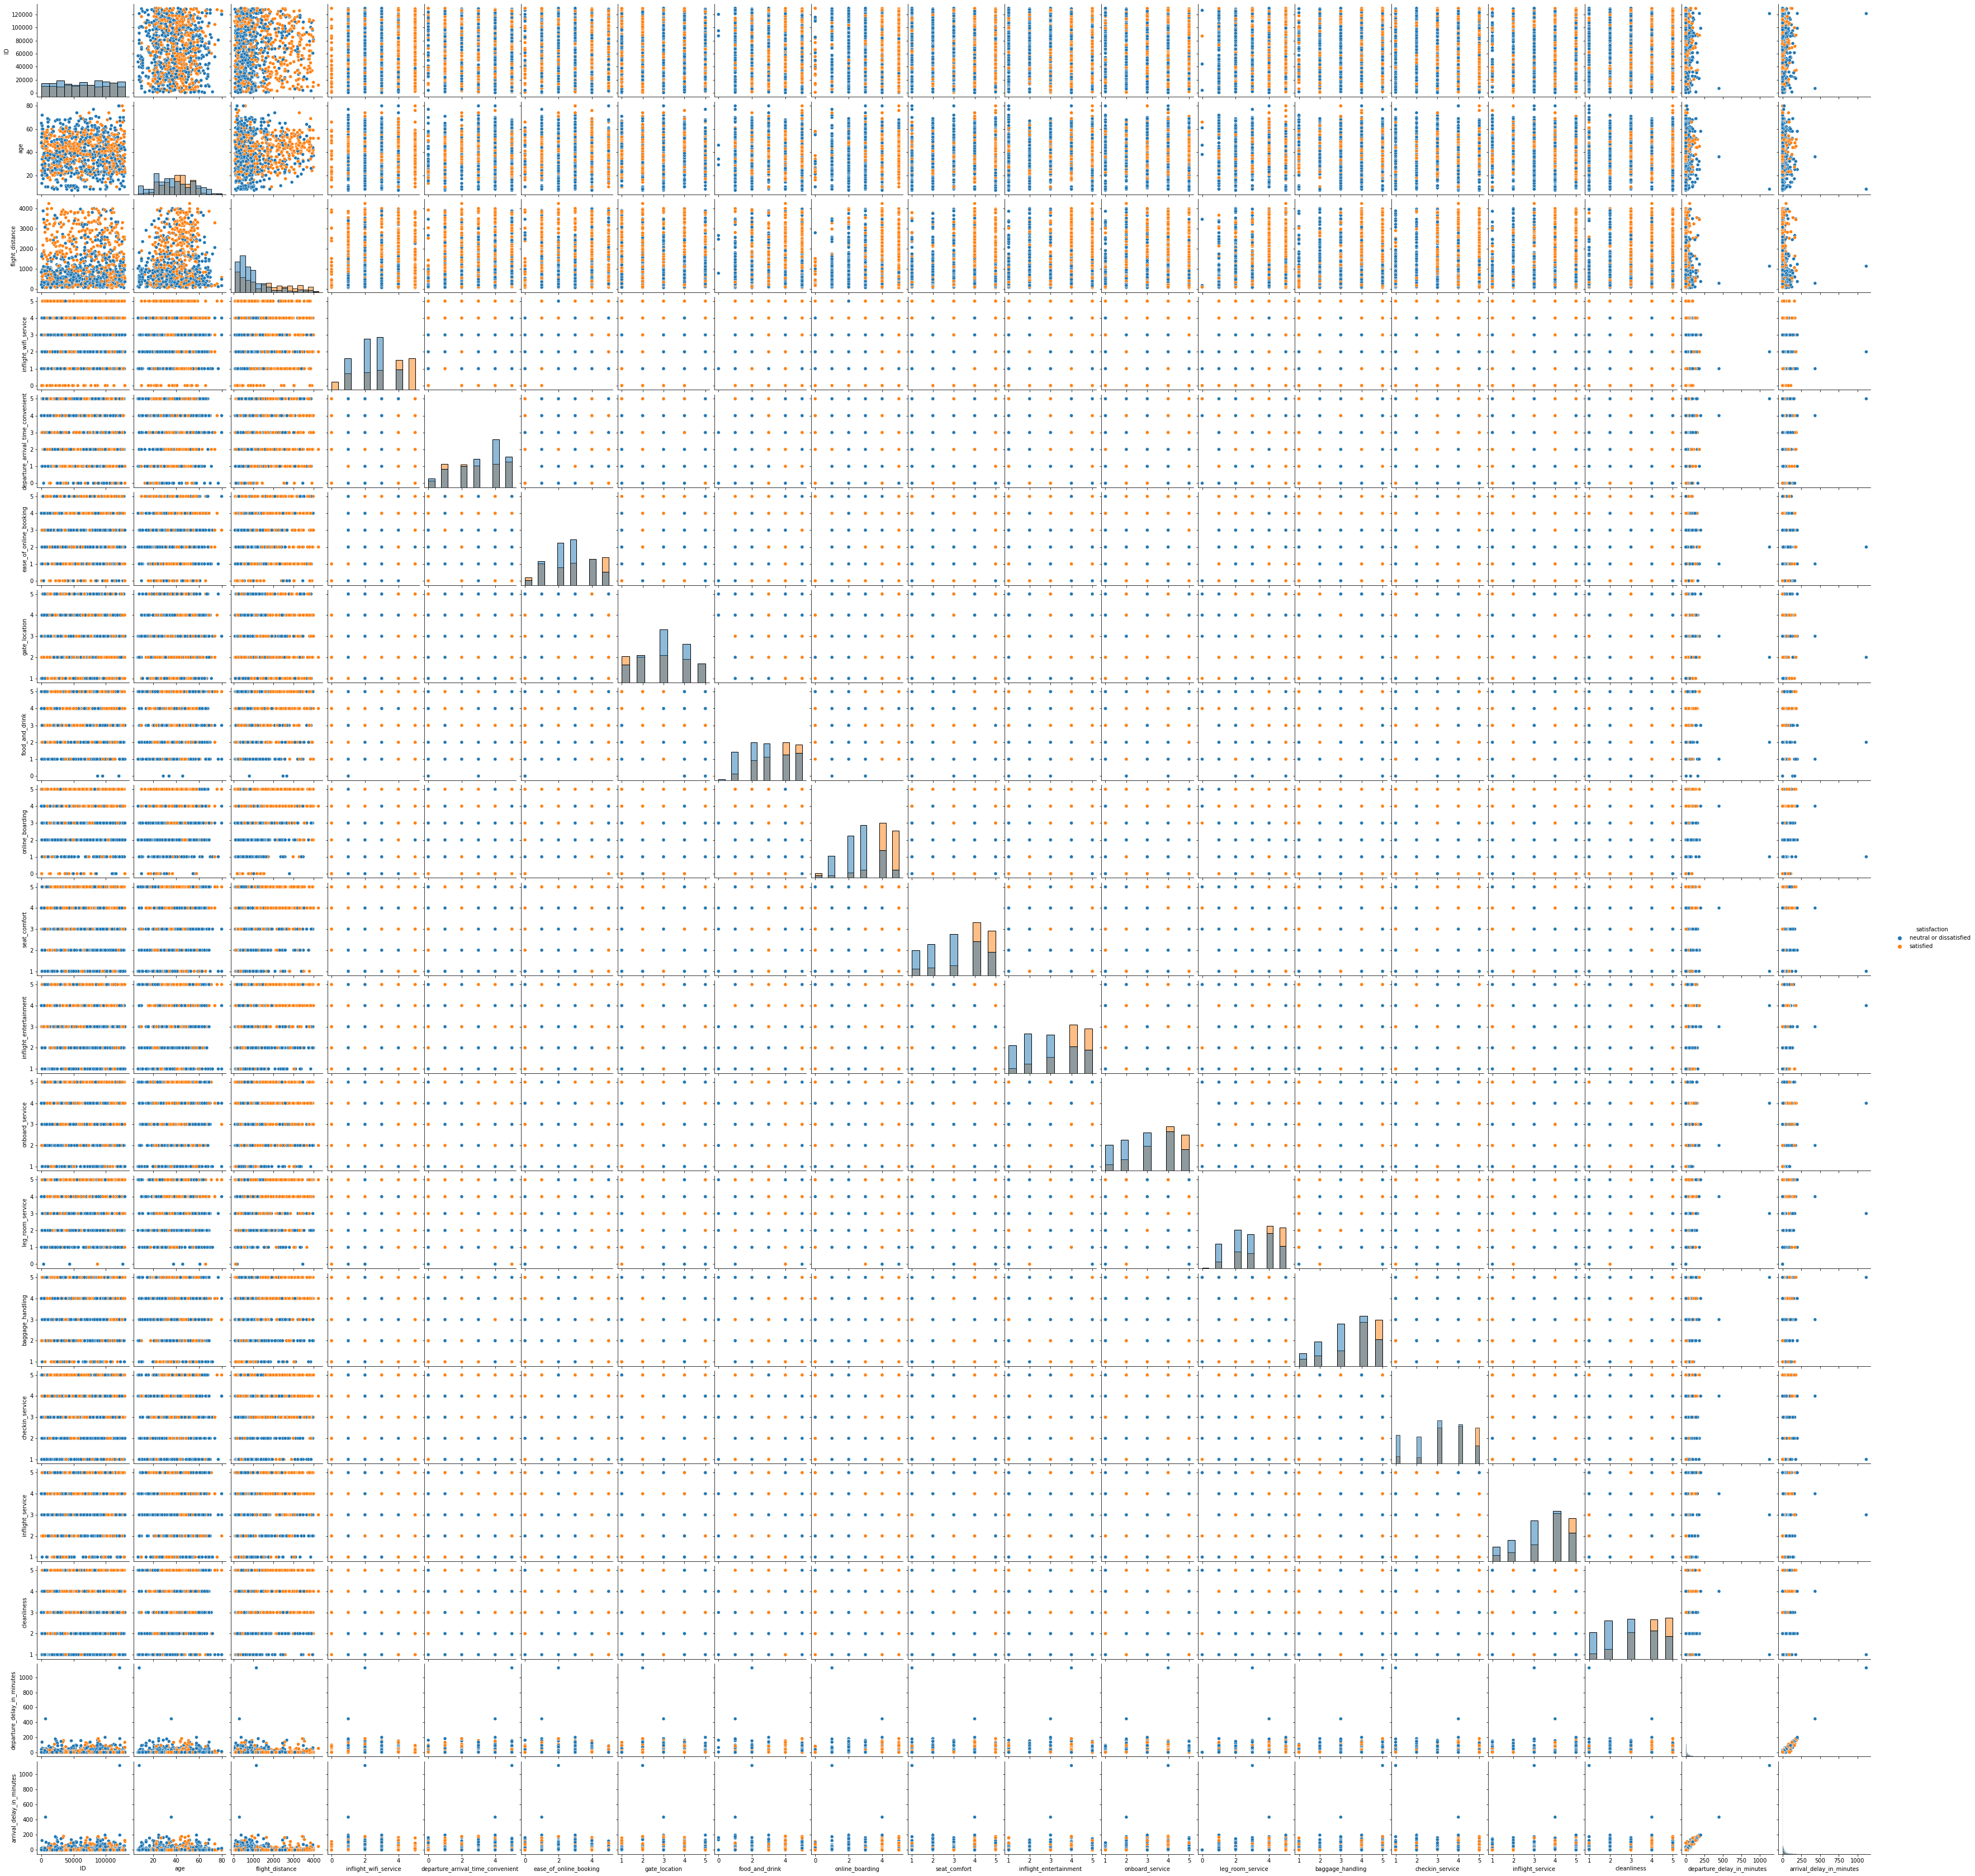

In [27]:
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='satisfaction', diag_kind='hist')

# 3) Обработка пропущенных значений

Только в одном столбце (задержка прибытия) отсутствуют значения, и их число невелико(393). Мы могли бы просто удалить соответствующие экземпляры, но что-то в диаграммах корреляции выше указывает на то, что, возможно, мы могли бы вменять их! Для этого мы сначала хотим проверить, насколько связаны задержка прибытия и задержка отправления:

Correlation between departure and arrival delays:  0.9652911835463153


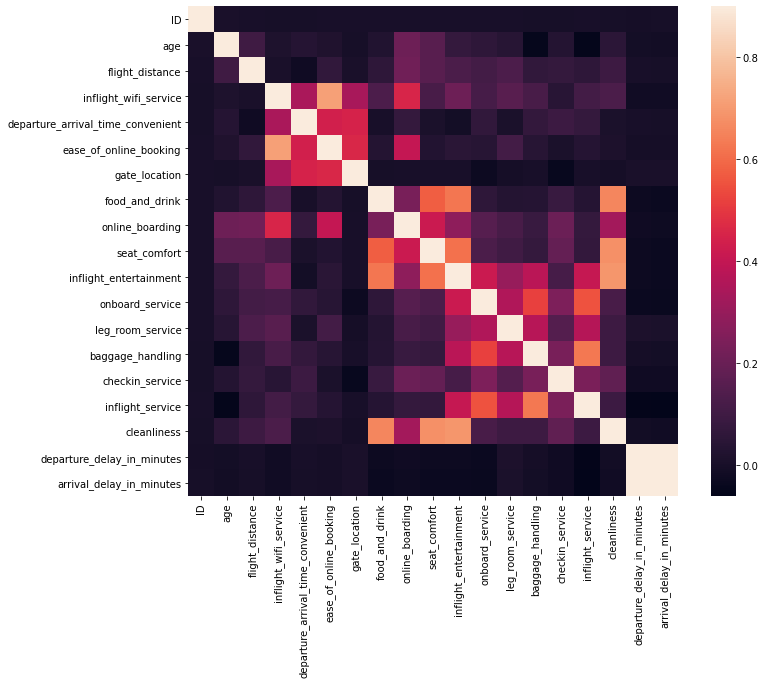

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data_raw.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
print ('Correlation between departure and arrival delays: ', corrmat['arrival_delay_in_minutes']['departure_delay_in_minutes'])

Совершенно очевидно, что две задержки сильно коррелированы (см. Две самые белые ячейки по диагонали), и действительно значение корреляции составляет 0,965. Таким образом, мы можем использовать данные о задержке отправления для вменения недостающих данных о задержке прибытия.

In [29]:
data_raw['arrival_delay_in_minutes'].fillna(data_raw['departure_delay_in_minutes'], inplace = True)
print (data_raw.isnull().sum())

ID                                   0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


# 4) Обработка категориальных признаков
Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [30]:
data_raw = pd.get_dummies(data_raw)
data_raw.drop(['Gender_Female','customer_type_Loyal Customer','type_of_travel_Business travel', 'customer_class_Business', 'satisfaction_neutral or dissatisfied'],axis=1,inplace=True)
print(data_raw.shape)
data_raw.head()

(129880, 25)


,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,0,13,460,3,4,3,1,5,3,5,...,5,5,25,18.0,1,0,1,0,1,0
1,1,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,1,1,0,0,0,0
2,2,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,3,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,4,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,1,0,0,0,0,1


# 5)Проведение нормализации  
Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.  
Приведем к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;

In [31]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.500000,0.415743,0.234111,0.545739,0.611520,0.551375,0.595385,0.640955,0.650527,0.688272,...,0.728439,0.657265,0.009242,0.009571,0.492616,0.183092,0.309416,0.448945,0.072459,0.434463
std,0.288678,0.193838,0.201424,0.265868,0.305348,0.280348,0.255704,0.265987,0.270144,0.263858,...,0.235334,0.262736,0.023914,0.024368,0.499947,0.386743,0.462255,0.497388,0.259248,0.495688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.423077,0.164176,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,...,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.564103,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,...,1.000000,0.800000,0.007538,0.008207,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6) Разбиение данных на обучающие и тестовые  
Для классификации удовлетворенности клиента будем использовать все признаки за исключением ID пассажира

In [32]:
X = data_normal.drop (['ID', 'satisfaction_satisfied'], axis=1) 
y = data_raw['satisfaction_satisfied']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

In [35]:
N_train, N_test

(97410, 32470)

# 7) Запуск классификатора ближайших соседей

In [36]:
from sklearn.neighbors import KNeighborsClassifier

Запустим классификатор KNN с параметром по умолчанию:

In [37]:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))  
  
err_train = np.mean(y_train != knn_default.predict(X_train))
err_test  = np.mean(y_test  != knn_default.predict(X_test))
print("Error) Train : {:.6f}, Test: {:.6f} ".format(err_train, err_test))


Accuracy) Train : 94.92%, Test: 92.94%. 
Error) Train : 0.050775, Test: 0.070650 


13 соседей

In [38]:
knn_13 = KNeighborsClassifier(n_neighbors = 13)
knn_13.fit(X_train, y_train)
knn_training_predict = 100 * knn_13.score(X_train, y_train)
knn_test_predict = 100 * knn_13.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_13.predict(X_train))
err_test  = np.mean(y_test  != knn_13.predict(X_test))
print("Error) Train : {:.6f}, Test: {:.6f} ".format(err_train, err_test))

Accuracy) Train : 93.65%, Test: 92.85%. 
Error) Train : 0.063484, Test: 0.071481 


8 соседей

In [39]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)
knn_8.fit(X_train, y_train)
knn_training_predict = 100 * knn_8.score(X_train, y_train)
knn_test_predict = 100 * knn_8.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_8.predict(X_train))
err_test  = np.mean(y_test  != knn_8.predict(X_test))
print("Error) Train : {:.6f}, Test: {:.6f} ".format(err_train, err_test))

Accuracy) Train : 93.87%, Test: 92.73%. 
Error) Train : 0.061328, Test: 0.072713 


2 соседа

In [40]:
knn_2 = KNeighborsClassifier(n_neighbors = 2)
knn_2.fit(X_train, y_train)
knn_training_predict = 100 * knn_2.score(X_train, y_train)
knn_test_predict = 100 * knn_2.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_2.predict(X_train))
err_test  = np.mean(y_test  != knn_2.predict(X_test))
print("Error) Train : {:.6f}, Test: {:.6f} ".format(err_train, err_test))

Accuracy) Train : 95.13%, Test: 91.50%. 
Error) Train : 0.048712, Test: 0.085032 


Как мы можем заметить, что при увеличении количества соседей, точность на обучаемой  выборке ухудшается, а на тестовой улучшается.Таким образом, можно использовать алгоритм к-ближайших соседей при k=5 или k=8 и алгоритм покажет хороший результат.

# 9) Запуск другого классификатора    
Возможно, самый простой способ предсказать цели по функциям - это использовать дерево решений. Мы используем модель sklearn с неограниченной глубиной:

In [41]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_train_score = 100 * dct.score(X_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100 * dct.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 36
Tree Leaves: 3864
Accuracy. Train : 100.00%, Test: 94.46%. 


Неудивительно, что дерево решений может идеально моделировать обучающую выборку. Что еще более информативно, он дает правильные более 94% тестового набора, что означает, что данные поддаются машинному обучению. Мы также узнаем, что идеальное дерево имеет глубину 36 и около 4000 листьев, что довольно велико. Попробуем посмотреть, как глубина влияет на точность.

Теперь возьмем глубину 15:

In [42]:
dct_15 = DecisionTreeClassifier(max_depth=15)
dct_15.fit(X_train,y_train)
dct_train_score = 100 * dct_15.score(X_train, y_train)
print ('Tree Depth:', dct_15.get_depth())
print ('Tree Leaves:', dct_15.get_n_leaves())
dct_test_score = 100 * dct_15.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 15
Tree Leaves: 1389
Accuracy. Train : 97.34%, Test: 95.12%. 


Уменьшим глубину до 10:

In [43]:
dct_10 = DecisionTreeClassifier(max_depth=10)
dct_10.fit(X_train,y_train)
dct_train_score = 100 * dct_10.score(X_train, y_train)
print ('Tree Depth:', dct_10.get_depth())
print ('Tree Leaves:', dct_10.get_n_leaves())
dct_test_score = 100 * dct_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 10
Tree Leaves: 293
Accuracy. Train : 94.94%, Test: 94.28%. 


Из приведенных выше результатов можно сделать вывод, что в данном алгоритме чем больше глубина дерева, тем точнее модель. Однако модель тестовой выборки при глубине 35 оказалась менее точна, чем  при глубине 15.

**Подведем итоги и сравним два приведенных выше метода.  
При оптимальных значениях каждого алгоритма, точнее оказался алгоритм Дерева Решений, как на обучающей, так и на тестовой выборке. А также, во время выполнения работы, было замечено, что алгоритм Дерева Решений производит тренировки и вычисления вероятности намного быстрее, чем алгоритм k-ближайших соседей.**

# Вывод

Проделав данную работу, мы проверили анализ удовлетворенности пассажиров от услуг, предоставленных авиакомпаний, а так же решили задачу классификации при помощи моделей, обученных алгоритмами k-ближайших соседей и Дерево Решений. По всем показателям, алгоритм Дерева Решений оказался лучше метода к-ближайших соседей.